<div style="border:solid Chocolate 2px; padding: 40px">

<b> Елизавета, привет!👋</b> 

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div> 


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

     
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

<br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Привет! Спасибо, что уделил время моему проекту. Постараюсь исправить все недочеты. </font>
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Cнова привет. Спасибо за заметное оформление твоих комментариев.
</div>


# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

###### Цель исследования:
Построить модель для определения стоимости автомобилей с пробегом.

###### Ход исследования:
1. Открыть и изучить предоставленные данные и подготовить их к исследованию.
2. Подготовить выборки для обучения моделей. 
3. Обучить разные модели с учетом подбора гиперпараметров.
4. Проанализировать время обучения, время предсказания и качество моделей.
5. Найти лучшую модель, соответствующую критериям заказчика.

## Подготовка данных

Импортируем необходимые библиотеки.

In [1]:
!pip install scikit-learn==1.1.3
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Если загружаем несколько функций из одного пакета, то удобнее записать все через запятую. По аналогии:
    
`from sklearn.model_selection import train_test_split, GridSearchCV`
      
        
</div>
    

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Поправила. Абсолютно с этим согласна, поторопилась и не заметила) </font>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 На самом деле так просто удобнее, есть ненавязчивые рекомендации так делать, но в целом в DS сообществе этому следуют не все. 
</div>

Откроем файл с данными и изучем его.

In [2]:
data_oridinal = pd.read_csv('/datasets/autos.csv')
data_oridinal.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [3]:
display(data_oridinal.info())
display(data_oridinal.describe())
display(data_oridinal.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

На основании полученной информации о данных, можно сделать вывод, что:
- В таблице действительно содержится информация, указанная в документах к ней;
- В столбцах VehicleType, Gearbox, Model , FuelType, Repaired содержатся пропуски;
- В некоторых столбцах присутствуют аномальные значения( например цена - 0 евро, год регистрации не может быть 1000 или 9999, максимальная мощность автомобиля не может быть 20000 л.с.)
- В таблице есть неинформативные столбцы, которые можно удалить - DateCrawled, RegistrationMonth, DateCreated, LastSeen, NumberOfPictures, PostalCode

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично. По всем пунктам согласен.
</div> 

### Удалим неинформативные столбцы.

In [4]:
data = data_oridinal.drop(['DateCrawled', 'RegistrationMonth','DateCreated', 
                           'LastSeen', 'NumberOfPictures', 'PostalCode'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int64 
 1   VehicleType       316879 non-null  object
 2   RegistrationYear  354369 non-null  int64 
 3   Gearbox           334536 non-null  object
 4   Power             354369 non-null  int64 
 5   Model             334664 non-null  object
 6   Kilometer         354369 non-null  int64 
 7   FuelType          321474 non-null  object
 8   Brand             354369 non-null  object
 9   Repaired          283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


### Обработка пропусков.

In [5]:
data.isna().mean()

Price               0.000000
VehicleType         0.105794
RegistrationYear    0.000000
Gearbox             0.055967
Power               0.000000
Model               0.055606
Kilometer           0.000000
FuelType            0.092827
Brand               0.000000
Repaired            0.200791
dtype: float64

В некоторых столбцах доля пропусков достигает аж 20%, при этом все пропуски категориальные - тип кузова, тип коробки передач, модель автомобиля, тип топлива и была ли машина в ремонте. В данном случае, не совсем понятно, как восстановить данные и есть риск восстановить их некорректно, что негативно повлияет на предсказание модели, поэтому заменим все пропуски на unknown.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Хорошая логичная аргументация и реализация.
</div>  
    

In [6]:
data.fillna('unknown', inplace=True)
data.isna().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
Repaired            0
dtype: int64

### Обработка аномалий

1. Посмотрим распределение данных в столбце Цена и удалим аномалии

<AxesSubplot:>

0        10772
500       5670
1500      5394
1000      4649
1200      4594
         ...  
13180        1
10879        1
2683         1
634          1
8188         1
Name: Price, Length: 3731, dtype: int64

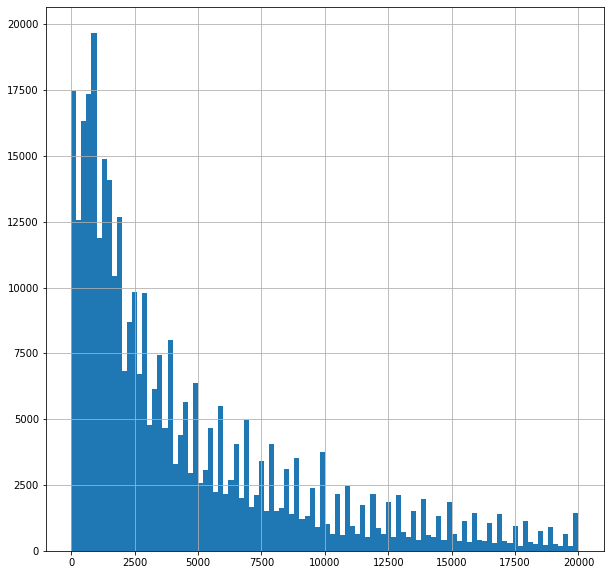

In [7]:
display(data['Price'].hist(bins=100, figsize=(10,10)))
display(data['Price'].value_counts())

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Графики в проекте нужно подписать.
       
</div> 


Цена машины не может быть 0 евро, либо это может значит что-то вроде "цена договорная" и т.п. Это будет сбивать нашу будущую модель, поэтому считаю, что строки с такими аномалиями лучше удалить (их не так много относительно общего количества данных).

In [8]:
data = data.loc[data['Price'] >= 50]
data['Price'].value_counts()

500      5670
1500     5394
1000     4649
1200     4594
2500     4438
         ... 
13225       1
15272       1
7016        1
837         1
8188        1
Name: Price, Length: 3695, dtype: int64

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Абсолютно верная аргументация. Да, ноль будет сбивать, но по этой же логике будет сбивать стоимость и в 1 евро. Не очень приятная ситуация будет для продавца, если модель скажет, что оценивает его любимую машину в 1 евро. 
    
Рекомендую взять некоторый более реалистичный минимум цен. Например, в 50 евро. За эту стоимость вполне уже могут продавать что-то близкое к металлолому.

</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Согласна, исправила.</font>
</div>

2. Обработаем аномалии в столбце RegistrationYear

In [9]:
# посмотрим, какие вообще значения присутствуют в этом столбце
data['RegistrationYear'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 2014, 1998, 2005, 1910, 2016,
       2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994, 1991,
       1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985, 1989,
       2015, 1982, 1976, 1983, 1973, 1969, 1971, 1987, 1986, 1988, 1980,
       1970, 1965, 1945, 1925, 1974, 1979, 1955, 1978, 1972, 1968, 1977,
       1961, 1966, 1975, 1963, 1964, 1960, 1958, 1967, 1956, 3200, 1000,
       1941, 9999, 8888, 1500, 2200, 4100, 1962, 1929, 1957, 1940, 3000,
       2066, 1949, 2019, 1937, 1951, 1800, 1959, 1953, 1954, 1234, 8000,
       5300, 9000, 2900, 6000, 5900, 5911, 1400, 5000, 1950, 4000, 1948,
       1952, 8500, 1932, 1255, 3700, 3800, 4800, 1942, 7000, 1935, 1933,
       1936, 1923, 2290, 1930, 1001, 9450, 1944, 2500, 1943, 1938, 1934,
       1928, 5555, 5600, 1600, 1111, 2222, 1039, 1300, 2800, 1931, 4500,
       1602, 7800, 1947, 1927, 7100, 8200, 1946])

In [10]:
data.RegistrationYear[data.RegistrationYear > 2016].count()

13704

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
И снова логично, но есть нюанс. У нас выше в удаленной колонке был год сбора данных - 2016. Соответственно, все годы позже − аномальны и подлежат удалению.

</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправила.</font>
</div>

In [11]:
data.RegistrationYear[data.RegistrationYear < 1970].count()

1130

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
А здесь не соглашусь. Машины старше определенного года выпуска будут продаваться как раритет и там будет совсем другое ценообразование. Думаю, что 1970-е годы - неплохой период для старта. 
    
Можно также посмотреть по гистограмме, с какого года данные в таблице у нас не единичны. 
</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Тоже исправила. Согласна с комментариями.</font>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Теперь все отлично.
</div>
 

Так как в таблице содержатся данные не старше 2016 года, то данные за период дальше 2016 года существовать не могут, так же как и данные ранее 1970. Удалим их.

In [12]:
data = data.loc[(data['RegistrationYear'] <= 2016) & (data['RegistrationYear'] >= 1970)]
data['RegistrationYear'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 2014, 1998, 2005, 2016, 2007,
       2009, 2002, 1997, 1990, 1981, 2003, 1994, 1991, 1984, 2006, 1999,
       2012, 2010, 2000, 1992, 2013, 1996, 1985, 1989, 2015, 1982, 1976,
       1983, 1973, 1971, 1987, 1986, 1988, 1980, 1970, 1974, 1979, 1978,
       1972, 1977, 1975])

3. Столбец Мощность(Power) тоже содержит аномалии. Избавимся и от них.

In [13]:
data['Power'].value_counts()

0       31697
75      22042
60      14710
150     13685
101     12383
        ...  
1339        1
416         1
6045        1
671         1
6006        1
Name: Power, Length: 677, dtype: int64

In [14]:
data.Power[data.Power > 2000].count()

100

In [15]:
data.Power[data.Power < 20].count()

32032

Максимальная мощность автомобиля на данный момент 2000 л.с., все значения, больше этого показателя придется удалить, как и предложения со слишком низкими показателями мощности.

In [16]:
data = data.loc[(data['Power'] <= 2000) & (data['Power'] >= 20)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294980 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             294980 non-null  int64 
 1   VehicleType       294980 non-null  object
 2   RegistrationYear  294980 non-null  int64 
 3   Gearbox           294980 non-null  object
 4   Power             294980 non-null  int64 
 5   Model             294980 non-null  object
 6   Kilometer         294980 non-null  int64 
 7   FuelType          294980 non-null  object
 8   Brand             294980 non-null  object
 9   Repaired          294980 non-null  object
dtypes: int64(4), object(6)
memory usage: 24.8+ MB


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
По нижней границе. Тут тоже машины с 1 л.с. не сильно более реалистичны, чем с 0 л.с. Я бы поставил границу в 20 л.с. минимум. 
    
По верхней - в целом можно согласиться, это максимум для спорткаров. Однако если уж быть точным, то в нашей таблице вряд ли будут машины (если соотносить по модели и году выпуска) с мощностью больше 500 л.с.

</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправила. </font>
</div>

Остальные столбцы в обработке аномалий не нуждаются.

### Проверка на дубликаты

In [17]:
data.duplicated().sum()

39006

In [18]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255974 entries, 0 to 255973
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             255974 non-null  int64 
 1   VehicleType       255974 non-null  object
 2   RegistrationYear  255974 non-null  int64 
 3   Gearbox           255974 non-null  object
 4   Power             255974 non-null  int64 
 5   Model             255974 non-null  object
 6   Kilometer         255974 non-null  int64 
 7   FuelType          255974 non-null  object
 8   Brand             255974 non-null  object
 9   Repaired          255974 non-null  object
dtypes: int64(4), object(6)
memory usage: 19.5+ MB


Удалили явные дубликаты и обновили индексы после удаления.

### Вывод:
Данные изучены. Проведена предобработка данных - обработаны пропущенные значения и аномалии, из таболицы удалены неинформативные столбцы, удалены дубликаты.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Я бы еще немного покопался в данных. Рекомендую посмотреть на то, какие у нас есть категории в колонках.

'gasoline', 'petrol' - это разные названия бензина. Эти категории можно сгруппировать.
       
В пробеге у нас всего 13 значений − полезно воспринимать этот признак как категориальный.

</div> 


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Думала над тем, чтобы объединить 'gasoline'и 'petrol', но решила этого не делать, исходя из того, что вдруг в этом разделении сознательно заложен какой-то принцип, и я тем самым сделаю только хуже для данных. 
    Что касается пробега, интересное замечание, мне в голову не приходило, что его можно воспринимать как категориальный признак. Сасибо за наводку.</font>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Отчасти да, например, если по разному названию бензина мы можем восстановить страну, а по стране будет некоторая корреляция с ценой. Но это все нужно проверять.
</div>
 

## Обучение моделей

### Подготовка признаков

Перед тем, как приступить к обучению моделей, необходимо подготовить признаки  - преобразовать категориальные в численные. Для этого будем использовать 2 техники - OHE и Ordinal Encoding (т.к. Ordinal Encoding больше подходит для модели случайного леса, которую мы будем использовать). 

In [20]:
# Разделим данные на обучающую и тестовую выборки
target = data['Price']
features = data.drop('Price', axis=1)

print(target.shape)
print(features.shape)

(255974,)
(255974, 9)


In [21]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, 
                                                                            random_state=12345)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(191980, 9)
(63994, 9)
(191980,)
(63994,)


In [22]:
# Выберем для кодирования только категориальные признаки
cat_features = features_train.select_dtypes(include='object').columns.to_list()
print(cat_features)

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']


In [23]:
# Вводим новые переменные для закодированных признаков
features_train_ohe = features_train.copy()
features_test_ohe = features_test.copy()

In [24]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# Обучаем энкодер на обучающей выборке 
encoder_ohe.fit(features_train_ohe[cat_features])

# Добавляем закодированные признаки в features_train_ohe и удаляем незакодированные
features_train_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train_ohe[cat_features])
features_train_ohe = features_train_ohe.drop(cat_features, axis=1)

# Аналогичным образом кодируем тестовую выборку
features_test_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_test_ohe[cat_features])
features_test_ohe = features_test_ohe.drop(cat_features, axis=1)

print(features_train_ohe.head())
print(features_test_ohe.head())
print(features_train_ohe.shape)
print(features_test_ohe.shape)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


        RegistrationYear  Power  Kilometer  VehicleType_convertible  \
190560              2008     90     150000                      0.0   
249587              2006    105     150000                      0.0   
70428               1999     65     125000                      0.0   
125622              2010     75      90000                      0.0   
33384               1993    115     150000                      0.0   

        VehicleType_coupe  VehicleType_other  VehicleType_sedan  \
190560                0.0                0.0                0.0   
249587                0.0                0.0                0.0   
70428                 0.0                0.0                0.0   
125622                0.0                0.0                0.0   
33384                 0.0                0.0                1.0   

        VehicleType_small  VehicleType_suv  VehicleType_unknown  ...  \
190560                0.0              0.0                  0.0  ...   
249587                1.0 

In [25]:
target_train_ohe = target_train.copy()
target_test_ohe = target_test.copy()

print(target_train_ohe.shape)
print(target_test_ohe.shape)

(191980,)
(63994,)


In [26]:
# data_ohe = pd.get_dummies(data, drop_first=True)
# data_ohe.head()

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В тренажере давался пример использования прямого кодирования с помощью get_dummies, однако это далеко не самый оптимальный вариант. Он подходит для анализа данных, но в машинном обучении может служить причиной ошибок при обучении моделей.
    
Можно использовать класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OHE из sklearn</a>. Он точно понадобится в будущих проектах, можно потренироваться сейчас. 

Практикум подготовил инструкцию, как использовать OHE: https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing 


Есть загвоздка, что нам нужно будет одновременно использовать параметры drop='first' и handle_unknown='ignore’.  в OHE, а на платформе такое сочетание может выдавать ошибку (в части случаев). Если ошибка появляется, необходимо загрузить нужную версию сайкит-лерна. Для этого:

1. В отдельной строке в самом начале проекта запускаем такую команду:
 `!pip install scikit-learn==1.1.3`
     
2. Находим в меню юпитера кнопку `Kernel`, нажимаем и выбираем Restart&Run all 


И сразу уточню, что OHE мы используем уже после разделения выборок на обучающую, валидационную и тестовую. Обучаем на трейне, применяем ко всем. Кодируем после разбиения по аналогии с масштабированием. Посмотреть поподробнее также <a href="https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset">можно здесь</a> .
      
</div> 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Закоментировала предыдущий код и воспользовалась твоей наводкой на OHE из sklearn. Единственное, смущает предупреждение, которое появляется после выполнения кода. Я все верно делаю?</font>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Сейчас уже не вижу предупреждений.
    
А так предупреждения можно убрать. `warnings.filterwarnings('ignore')` после `import warnings`.

Или `pd.options.mode.chained_assignment = None`  - этот вариант будет, если предупреждение ругается на ссылки на «слайсы».

</div>
 

In [27]:
# Вводим новые переменные для закодированных признаков
features_train_ordinal = features_train.copy()
features_test_ordinal = features_test.copy()

In [28]:
encoder_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

features_train_ordinal[cat_features] = encoder_ordinal.fit_transform(features_train[cat_features])
target_train_ordinal = target_train.copy()

features_test_ordinal[cat_features] = encoder_ordinal.transform(features_test[cat_features]) 
features_test_ordinal = features_test_ordinal.dropna()
target_test_ordinal = target_test[features_test_ordinal.index]

print(features_train_ordinal.head())
print(features_test_ordinal.head())
print(features_train_ordinal.shape)
print(features_test_ordinal.shape)
print(target_train_ordinal.shape)
print(target_test_ordinal.shape)

        VehicleType  RegistrationYear  Gearbox  Power  Model  Kilometer  \
190560          0.0              2008      1.0     90  237.0     150000   
249587          5.0              2006      1.0    105   42.0     150000   
70428           5.0              1999      1.0     65   83.0     125000   
125622          8.0              2010      1.0     75  142.0      90000   
33384           4.0              1993      1.0    115  226.0     150000   

        FuelType  Brand  Repaired  
190560       2.0   24.0       0.0  
249587       6.0   24.0       0.0  
70428        6.0   24.0       0.0  
125622       6.0    6.0       0.0  
33384        6.0   38.0       1.0  
        VehicleType  RegistrationYear  Gearbox  Power  Model  Kilometer  \
144112          4.0              2005      1.0    175  233.0     150000   
143152          4.0              2003      0.0    150   95.0     150000   
25256           1.0              2010      1.0    140   10.0     100000   
120205          4.0              

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
В кодирование стоит определять только категориальные признаки. Чтобы избегать утечки таргета, стоит кодировать после разделения на выборки.
    
По аналогии:
    
```
encoder_ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

features_train_ord = features_train.copy()
features_train_ord[cat_columns] = encoder_ord.fit_transform(features_train[cat_columns])
target_train_ord = target_train.copy()

features_valid_ord = features_valid.copy()
features_valid_ord[cat_columns] = encoder_ord.transform(features_valid[cat_columns])
features_valid_ord = features_valid_ord.dropna()
target_valid_ord = target_valid[features_valid_ord.index]    
    
```
    
handle_unknown='use_encoded_value' - мы используем для того, чтобы помечать категории, которые не встретятся в тренировочной выборке (на которой обучили энкодер), но встретятся в тестовой. Чтобы код не падал, заменяем там кодировку пропусками, а затем дропаем эти строки.

</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Спасибо на наводку на новые параметры в OrdinalEncoder! Исправила по твоей рекоммендации. Единственное, у меня после такого кодирования в тестовой выборке дропнулись две строки, в отличие от кодирования OHE. Получается, что это категории, которые не встретились в обучающей, но встретились в тестовой. Это никак негативно не повлияет на дальнейшее обучение моделей?</font>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Нет. Мы так и заложили, что мы их будем дропать. В реальных данных подобные случаи будем пропускать и скорее всего либо обрабатывать отдельно, либо заполнять константой.
</div>
  

Закодировали тпаблицу. Теперь необходимо разделить каждую на признаки и целевой признак и разделить их на обучающую и тестовую выборки.

In [29]:
#target_ohe = data_ohe['Price']
#features_ohe = data_ohe.drop('Price', axis=1)

#print(target_ohe.shape)
#print(features_ohe.shape)

In [30]:
#features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(features_ohe, target_ohe, 
                                                                                            #test_size=0.25, random_state=12345)
#print(features_train_ohe.shape)
#print(features_test_ohe.shape)
#print(target_train_ohe.shape)
#print(target_test_ohe.shape)

In [31]:
#target_ordinal = data_ordinal['Price']
#features_ordinal = data_ordinal.drop('Price', axis=1)

#print(target_ordinal.shape)
#print(features_ordinal.shape)

In [32]:
#features_train_ordinal, features_test_ordinal, target_train_ordinal, target_test_ordinal = train_test_split(features_ordinal, 
                                                                                                            #target_ordinal, 
                                                                                                            #test_size=0.25, 
                                                                                                            #random_state=12345)
#print(features_train_ordinal.shape)
#print(features_test_ordinal.shape)
#print(target_train_ordinal.shape)
#print(target_test_ordinal.shape)

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен
</div>  

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Код выше закоментировала за ненадобностью.</font>
</div>

Далее необходимо провести масштабирование признаков.

In [33]:
scaler = StandardScaler()
scaler.fit(features_train_ohe)
features_train_ohe = scaler.transform(features_train_ohe)
features_test_ohe = scaler.transform(features_test_ohe)

In [34]:
scaler = StandardScaler()
scaler.fit(features_train_ordinal)
features_train_ordinal = scaler.transform(features_train_ordinal)
features_test_ordinal = scaler.transform(features_test_ordinal)

Признаки готовы к обучению моделей. Для обучения возмем модели - LightGBM, Линейную регрессию и Модель случайного леса.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Здесь все корректно.
</div> 


### Модель LightGBM

In [35]:
model_lgbm = LGBMRegressor(random_state=12345)

# Подготовим параметры для нашей модели 
params = {'n_estimators': range (50, 100, 10),
          'max_depth': range (5, 15, 5),
          'learning_rate': [0.05, 0.1, 0.3]
          }


# Для подбора наилучших параметров будем использовать GridSearchCV 
grid = GridSearchCV(estimator=model_lgbm, param_grid=params, cv=3, scoring = 'neg_mean_squared_error')

grid.fit(features_train_ordinal, target_train_ordinal)

print("Наилучшие параметры:", grid.best_params_)
print("RMSE:", (grid.best_score_ * -1)**0.5)

Наилучшие параметры: {'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 90}
RMSE: 1645.1013600445272


In [ ]:
model_lgbm = LGBMRegressor(random_state=12345,
                          n_estimators=90,
                          max_depth=10,
                          learning_rate=0.3)
model_lgbm.fit(features_train_ordinal, target_train_ordinal)

cross_val_lgbm = cross_val_score(model_lgbm, 
                             features_train_ordinal, 
                             target_train_ordinal, 
                             cv=3, 
                             scoring='neg_mean_squared_error')

rmse = (cross_val_lgbm.mean() * -1) ** 0.5
print("RMSE LightGBM:", rmse)

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
 
По коду согласен. По результату - нужно поправить кодирование и перепроверить.
    
Пока результат нереалистичен.
</div>  
    
      

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Вот теперь все супер.
</div>
  

### Модель Линейной регресии

In [ ]:
model = LinearRegression()
model.fit(features_train_ohe, target_train_ohe)
predictions = model.predict(features_train_ohe)
rmse = mean_squared_error(target_train_ohe, predictions)**0.5
print("RMSE:", rmse)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Здесь все корректно.
</div> 
 
     

### Модель Случайного леса

In [ ]:
model_forest = RandomForestRegressor(random_state=12345)
params_forest = {'n_estimators': range (50, 100, 10),
          'max_depth': range (5, 15, 5),
          'min_samples_split': range (2,10,2)
          }

grid = GridSearchCV(estimator=model_forest, param_grid=params_forest, cv=3, scoring = 'neg_mean_squared_error')

grid.fit(features_train_ordinal, target_train_ordinal)

print("Наилучшие параметры:", grid.best_params_)
print("RMSE:", (grid.best_score_ *-1)**0.5)

в результате мы получили наилучшие параметры модели. Изучим время обучения, время предсказания и качество моделей на кросс-валидации. Затем проверим лучшуй по всем показателям модель на тестовой выборке.

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Tестирование − финальная проверка качества модели. Лучшую модель мы выбираем на этапе исследования. Здесь мы смотрим на качество по кросс-валидации и на время обучения+время предсказания моделей. Тестирование дает представление о том, какое ожидаемое качество модель продемонстрирует после внедрения, но не более того.

</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправила, сделала расчет качества (RMSE) на кросс-валидации и затем проверила наилучшую модель на тестовой выборке. </font>
</div>


## Анализ моделей

### Модель LightGBM

Найдем время обучения модели 

In [ ]:
%%time

model_lgbm = LGBMRegressor(random_state=12345,
                          n_estimators=90,
                          max_depth=10,
                          learning_rate=0.3)
model_lgbm.fit(features_train_ordinal, target_train_ordinal)

Найдем время предсказания модели на тестовой выборке и RMSE

In [ ]:
%%time

predictions = model_lgbm.predict(features_test_ordinal)

In [ ]:
cross_val_lgbm = cross_val_score(model_lgbm, 
                             features_train_ordinal, 
                             target_train_ordinal, 
                             cv=5, 
                             scoring='neg_mean_squared_error')

rmse = (cross_val_lgbm.mean() * -1) ** 0.5
print("RMSE LightGBM:", rmse)

### Модель Линейной регресии

Найдем время обучения модели 

In [ ]:
%%time

model = LinearRegression()
model.fit(features_train_ohe, target_train_ohe)

Найдем время предсказания модели на тестовой выборке и RMSE

In [ ]:
%%time

predictions = model.predict(features_test_ohe)

In [ ]:
cross_val_lr = cross_val_score(model, 
                             features_train_ohe, 
                             target_train_ohe, 
                             cv=5, 
                             scoring='neg_mean_squared_error')

rmse = (cross_val_lr.mean() * -1) ** 0.5
print("RMSE LinearRegression:", rmse)

### Модель Случайного леса

Найдем время обучения модели

In [ ]:
%%time

model_forest = RandomForestRegressor(random_state=12345,
                                     n_estimators=90,
                                     max_depth=10,
                                     min_samples_split=4)
model_forest.fit(features_train_ordinal, target_train_ordinal)

Найдем время предсказания модели на тестовой выборке и RMSE

In [ ]:
%%time

predictions = model_forest.predict(features_test_ordinal)

In [ ]:
cross_val_forest = cross_val_score(model_forest, 
                             features_train_ordinal, 
                             target_train_ordinal, 
                             cv=5, 
                             scoring='neg_mean_squared_error')

rmse = (cross_val_forest.mean() * -1) ** 0.5
print("RMSE LightGBM:", rmse)

Внесем данные в таблицу для наглядности.

In [ ]:
models = [['LightGBM', 3.2, 0.397, 1639.45], ['LinearRegression', 20, 0.018, 4329.01],
         ['Forest', 21.8, 0.481, 1880.00]] 
    
df = pd.DataFrame(models, columns =['модель', 'обучение, сек', 'предсказание, сек', 'rmse']) 
df 

Проверим качество наилучшей модели на тестовой выборке.

In [ ]:
model_lgbm = LGBMRegressor(random_state=12345,
                          n_estimators=90,
                          max_depth=10,
                          learning_rate=0.3)
model_lgbm.fit(features_train_ordinal, target_train_ordinal)

predictions = model_lgbm.predict(features_test_ordinal)


rmse = mean_squared_error(target_test_ordinal, predictions)**0.5
print("Итоговый RMSE", rmse)

Вывод: Наиболее быстрой и качественной моделью оказалась Модель LightGBM - скорость ее обучения составила менее 5 секунд, а RMSE - 1639,5. Данная модель также показала хорошее качество и на тестовой выборке - RMSE 1634,8.

 
<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Важно сначала выбрать финальную модель, а затем ее протестировать. Подбирать модель на тестовой выборке будет ошибочно.
       
</div> 
  

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправила. Появился вопрос, можно ли как-то сделать сравнительную таблицу более универсальной? чтобы не вносить в таблицу цифры, а чтоб время в таблице заполнялось автоматически, например, если какие-то параметры модели нужно будет изменить? </font>
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Да, например, если брать время исполнения кода из кросс-валидации и сохранять в переменные, а затем из переменных собирать таблицу. Буквально недавно увидел такой вариант в одной из работ. 
    
```
# допустим, сделали кросс-валидацию. Дальше через cv_results_ получаем время и передаем его в переменную.
    
results_ridge = gs_ridge.cv_results_
best_index_ridge = gs_ridge.best_index_

ridge_fit_time = results_ridge['mean_fit_time'][best_index_ridge]
ridge_score_time = results_ridge['mean_score_time'][best_index_ridge]
ridge_RMSE = results_ridge['mean_test_score'][best_index_ridge] * -1

print(f"Fit time: {ridge_fit_time}, Predict time: {ridge_score_time}, Best RMSE: {ridge_RMSE}")

    
    
```
</div>
  

## Общий вывод

#### Этап 1. Подготовка данных.
В ходе этого этапа был открыт файл и изучены данные. Они действительно соответствовали документации. Была проведена проверка на пропуски и дубликаты. Пропуски не подлежали восстановлению и были удалены, дубликаты так же были удалены. В ходе подготовки данных для передачи их модели мы так же избавились от аномалий и неинформативных столбцов.

#### Этап 2. Обучение моделей
Для обучения моделей были преобразованы признаки. Категориальные признаки были преобразованы в численные, также данные масштабированны, чтобы не вводить в заблуждение модель.

Были обучены три модели - LightGBM, Линейную регрессию и Модель случайного леса - и были найдены наиболее подходящие гиперпараметры, благодаря которым модели выдавали наилучшее качество.

#### Этап 3. Анализ моделей
В ходе этого этапа был произведен анализ времени обучения и предсказания каждой модели, а так же их качество на тестовой выборке. В результате наиболее быстрой и качественной показала себя модель LightGBM - скорость ее обучения составила менее 5 секунд, а RMSE - 1639,5.


 <div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Выводы необходимо будет перепроверить и синхронизировать с решениями по коду.
       
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проверке**

У тебя получился хороший проект. Неплохой выбор моделей для обучения, много верных решений. Однако есть и что доработать.
    
* Важно уточнить по границам с аномалиями. Необходимо удалить все нереалистичные данные. 
* Необходимо поправить по порядковому кодированию: здесь не стоит подавать в кодирование признаки кроме категориальных. Само кодирование проводим после разделения на выборки.
* Лучшую модель выбираем до тестирования. Мы можем замерять время предсказания моделей на тестовой выборке, но сам результат при выборе финальной модели не учитываем. Ориентируемся на результат по кросс-валидации.
    
    
    
**Желаю удачи и жду твой проект на повторное ревью!**😉

</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку. Критичных комментариев нет. 
    
Если что-то пропустил или остались вопросы, напиши на телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей